In [1]:
install.packages('tidyverse')
install.packages('gridExtra')

library(gridExtra)
library(ggplot2)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Ex.1 Discrete random variable

## 1) Write the R probability functions for the probability density and cumulative distribution functions, following the R naming convention

In [2]:
k <- c(1,2,3,4,5)

dunif.2 <- function(n) {
    duni2 <- ifelse(n>0 & n<6, 
            n/15, 0)
    return (duni2)
    }

# punif.2 <- function(n) {
#     punif2 <- ifelse(n>0 & n<6, 
#                     (n**2)/30,0)
#     return (punif2)
#     }

punif.2 <- function(n) {
    punif2 <- ifelse(n>0 & n<6, 
                    (n**2)/30,
                    ifelse(n <=0, 0, 1))
    return (punif2)
    }

## 2) Produce two plots showing the pdf and cdf, separately

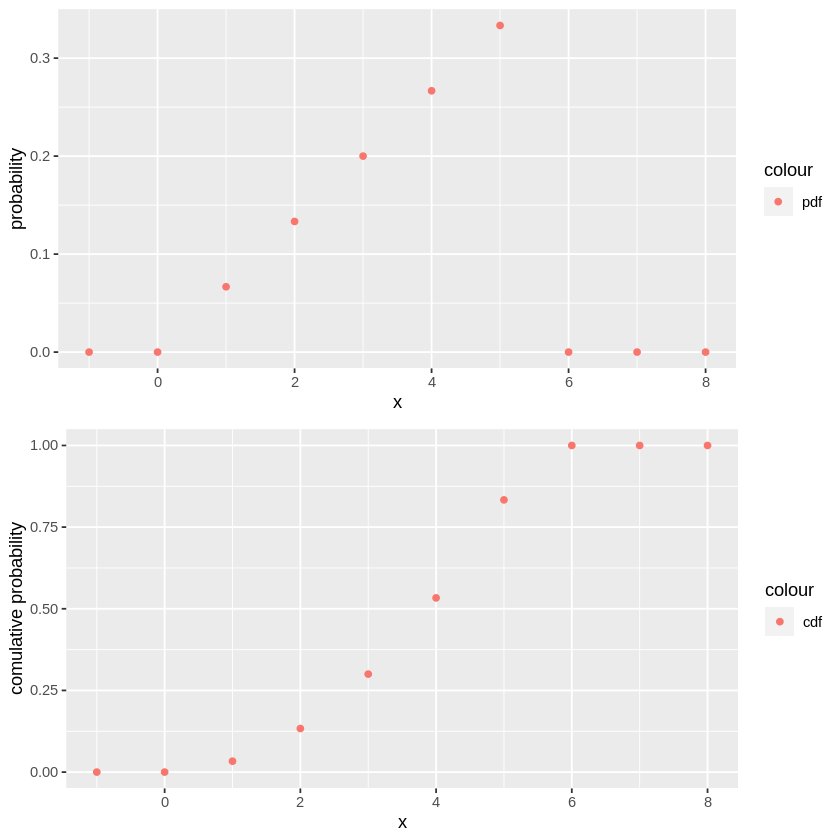

In [3]:
x <- -1:8
d <- dunif.2(x)
c <- punif.2(x)

pdf_plot <- ggplot() + geom_point(aes(x=x, y=d, colour='pdf')) + labs(x='x', y='probability')
cdf_plot <- ggplot() + geom_point(aes(x=x, y=c, colour='cdf')) + labs(x='x', y='comulative probability')

grid.arrange(pdf_plot, cdf_plot, nrow=2)

## 3) Compute, using R, the mean value and variance of the probability distribution

In [4]:
## mean 
E.X <- integrate(function(n) {n * dunif.2(n)}, lower = 0, upper=5)
E.X <- E.X$value

#variance
E.X2 <- integrate(function(n) {n**2 * dunif.2(n)}, lower=0, upper=5)
E.X2 <- E.X2$value

Var.X <- E.X2 - E.X**2

cat('The mean of the probability distribution function is:', E.X, '\n')
cat('The variance of the probability distribution function is:', Var.X)

The mean of the probability distribution function is: 2.777778 
The variance of the probability distribution function is: 2.700617

## 4) Compute, using R, the expected value E [k (6 − k)]

In [5]:
E.X.k <- integrate(function(k) {k*(6-k) * dunif.2(k)}, lower=0, upper = 5)

E.X.k <- E.X.k$value

cat('The expected value E [k (6 − k)]:', E.X.k)

The expected value E [k (6 − k)]: 6.25

## 5) Write the R function that allows to sample random numbers from the probability distribution 

In [6]:
sample <- function(n) { 
    S <- runif(n, min=0, max=1)
    a <- c()
    for (s in S){
        for (i in seq(1,5,1)){
            if(s > punif.2(i-1) & s<punif.2(i)){
                a <- c(a, i)
            }
        }
    }
    return (a)
}

## 6) Using the implemented function (point (5)), sample 10^5 random numbers from this distribution and plot them in a graph showing the distribution of the numbers superimposed to the pdf (normalize properly the plots with random numbers)

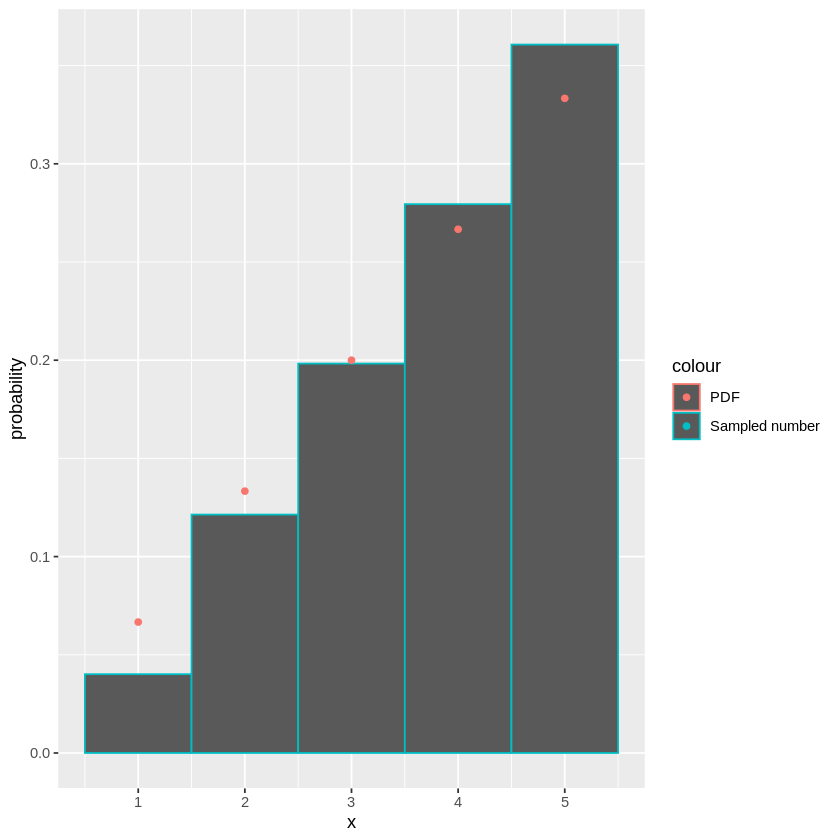

In [8]:
a <- sample(10**5)

x <- 1:5
d <- dunif.2(x)

ggplot() + 
geom_histogram(aes(a,y=..count../sum(..count..), colour='Sampled number'), bins=5) + 
geom_point(aes(x=x, y=d, colour='PDF')) +  labs(x='x', y='probability')

# Ex.2 Continuous random variable

## a) Plot the function given the interval (a,b)
c was taken to be in the middle between a and b, but it can be changed

In [9]:
a <- 0; b <- 1; c <- (a+b)/2
x <- seq(-2, 2, length.out = 1000)

In [10]:
d.2 <- function(n, a, b, c) {
    d <- ifelse(n >= a & n <= b, 
                ifelse(n < c, 2*(n-a)/((b-a)*(c-a)), 2*(b-n)/((b-a)*(b-c)) ),
                0)
    return(d)
    }

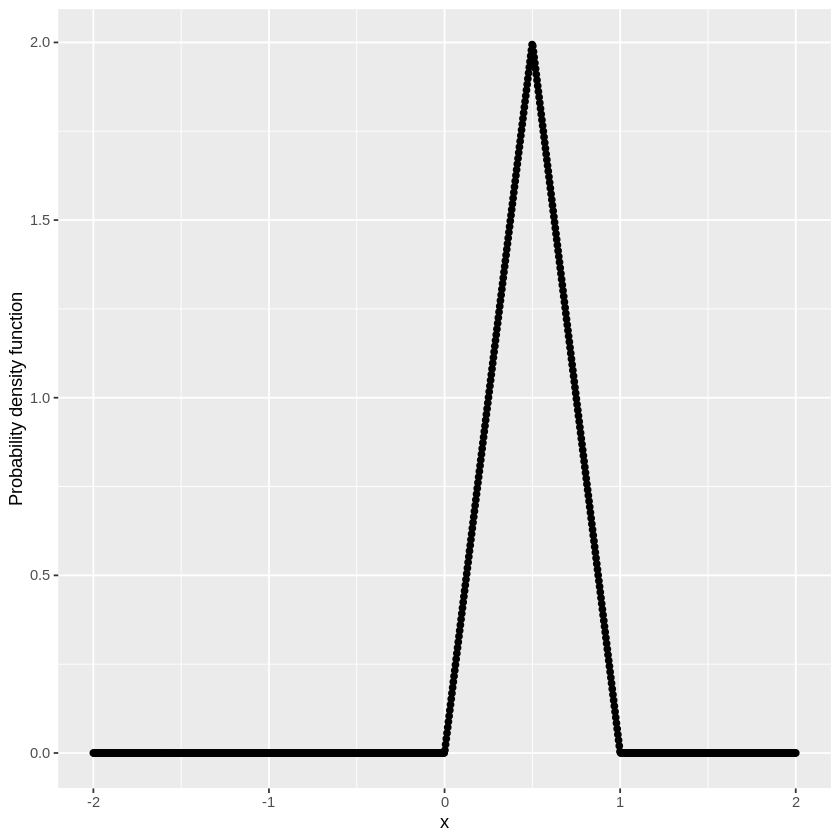

In [11]:
ggplot() +
geom_point(aes(x=x, y=d.2(x, a, b, c))) +
labs(x='x', y='Probability density function')

## b) Write an algorithm to generate random numbers from the triangular distribution 

First we generate the comulative probability function 

In [12]:
p.2 <- function(n, a, b, c){
    p2 <- ifelse(n >= a & n <= b, 
                ifelse(n <c, (n**2 - 2*a*c)/((b-a)*(c-a)), (2*b*n-n**2)/((b-a)*(b-c))-1),
                ifelse(n < a, 0, 1))
    return (p2)
    }

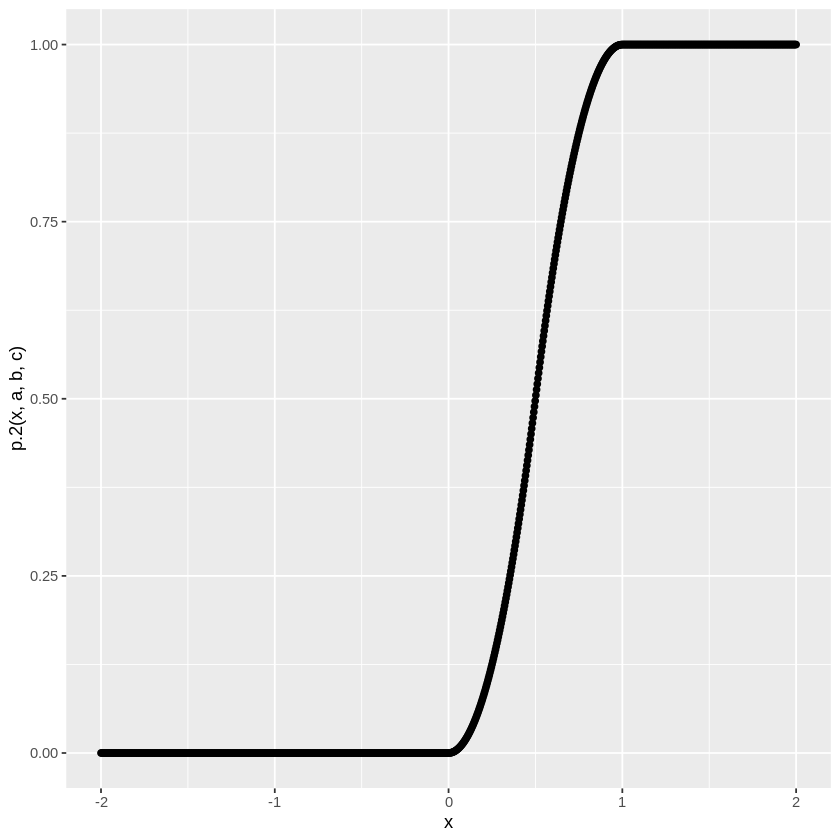

In [13]:
ggplot() + 
geom_point(aes(x=x, y=p.2(x,a,b,c)))
#labs(x='x', y='Comulative probability function')

In [14]:
sample_d2 <- function(n){
    S = runif(min=0, max=1, n)
    t <- c()
    for(s in S){
        if(s <= p.2(c, a,b,c)){
            t <-c(t, sqrt(s*(b-a)*(c-a) + a**2) +a) 
            }
        else{ 
            t <- c(t, -sqrt(b**2 -(s+1)*(b-a)*(b-c))+b)
            }
        }
    return(t)
    }

## c) Generate 10^4 random number from the distribution, show them in an histogram and superimpose the analytical curve

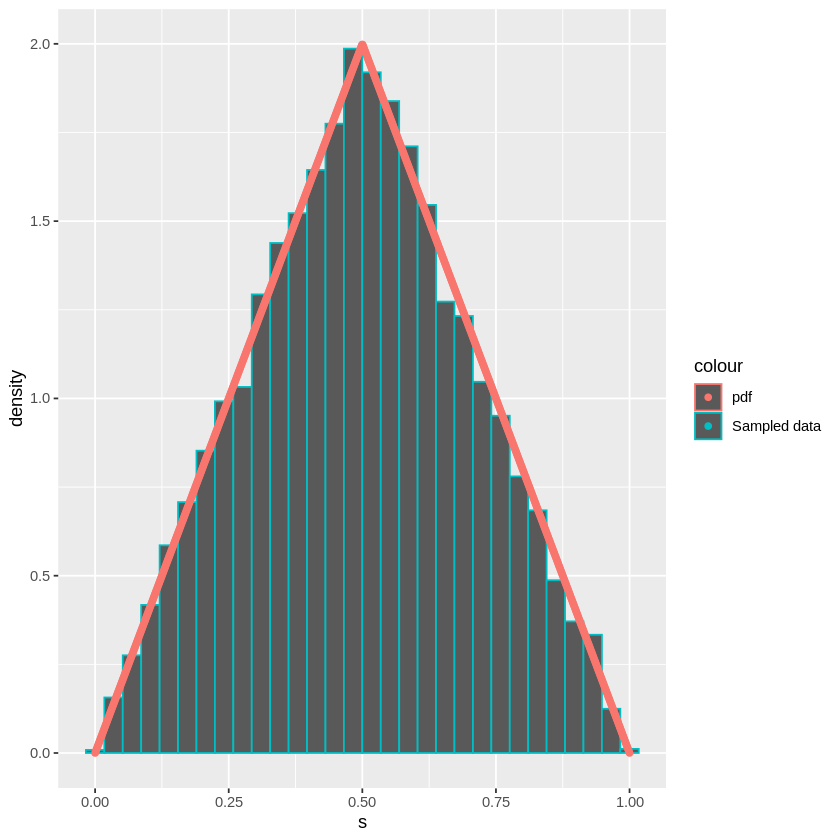

In [15]:
x <- seq(a,b,length.out = 1000)
s <- sample_d2(10**4)
ggplot()+
geom_histogram(aes(s, y=after_stat(density), colour='Sampled data'), bins=30) +
geom_point(aes(x=x, y=d.2(x,a,b,c), colour='pdf'))

# Ex. 3
The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an
exponential pdf with rate 1/30

## A) Simulate the waiting time for 60 people at the doctor’s office and plot the relative histogram

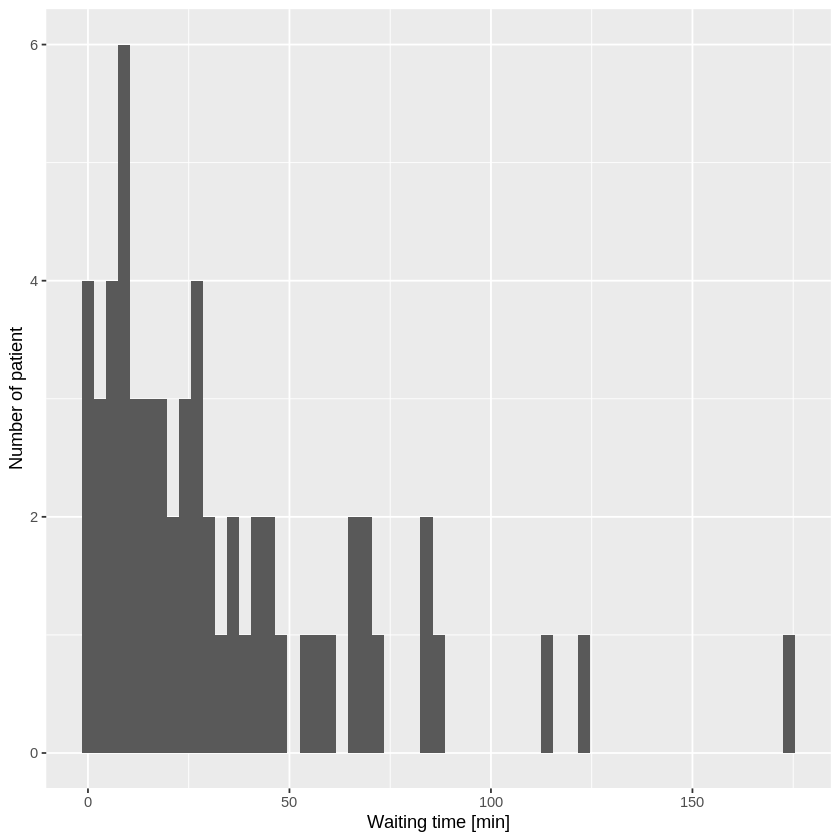

In [16]:
lambda <- 1/30
time <- rexp(60, rate=lambda)

ggplot() + geom_histogram(aes(x=time), binwidth=3) + labs(x='Waiting time [min]', y='Number of patient')

## B) What is the probability that a person will wait for less than 12 minutes ?

In [17]:
prob_less12min <- pexp(12, rate=lambda)
cat('The probability that a person will wait for less than 12 minutes is:', prob_less12min)

The probability that a person will wait for less than 12 minutes is: 0.32968

## C) Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [18]:
cat('The average waiting time, simulated from the data is:', mean(time))

The average waiting time, simulated from the data is: 34.27424

In [19]:
average_value <- integrate(function(x) {x*dexp(x, rate=lambda)}, lower=0, upper = Inf)
cat('The expected value from the theory is:', average_value$value)

The expected value from the theory is: 30

## D) What is the probability for waiting more than one hour before being received ?

In [20]:
prob_more60min <- 1 - pexp(60, lambda)
cat('Probability of waiting more than one hour:', prob_more60min)

Probability of waiting more than one hour: 0.1353353

# Ex. 4  Multiple choices exams
* The final exam of a course is given to the students in the format of a multiple choice written test: for each questions there are five possible alternativesthe
* a student either knows the answer, or selects randomly the answer among the five possible choices
* Assuming p = 0.7 the probability that the student knows the answer, once a correct answer is given, what it the probability that the student really knew the correct answer ?

## 1) write a small R program to provide the answer

Firstly we need to provide proper definition for the problem:
* R is the event of giving the right aswer
* W is the event of giving the wrong aswer
* K is the event of knowing the answer
* DK is the event of not knowing the answer

Also we know that:
* P(K) = 0.7 $\implies$ P(DK) = 0.3
* P(R|K) = 1 and P(W|K) = 0
* P(R|DK) = 1/5 and P(W|DK) = 4/5

We want to find out: P(K|R)

Using Bayes theorem we can write:

$ P(K|R) = \frac{ P(R|K)P(K) }{ P(R|K)P(K) + P(R|DK)P(DK)} $

In [21]:
K <- 0.7
DK <- 0.3
R_K <- 1
R_DK <- 1/5

K_R <- (R_K * K)/((R_K * K)+(R_DK *DK))

cat('The probability of giving the knowing the answare once a correct asnwer is given is:', K_R)

The probability of giving the knowing the answare once a correct asnwer is given is: 0.9210526

# Ex. 5 - Waiting time -DA RIVEDERE ANCHE DOPO LE 11.45 c'è un treno

### Reframe of the problem
The time intervall between 10:45 and 11:45 is gonna be mapped into the [0,60] intervall. This implies that the trains, namely the ones at 11:00, 11:30 and 12:00, are gonna be mapped at t = 15, t = 45 and t=75, also riported as red dotted line in the figure below. The pdf that describe the arrival time is gonna be taken as a uniform distribution. since peolpe are expected to arrive at random times between 0 and 60. 

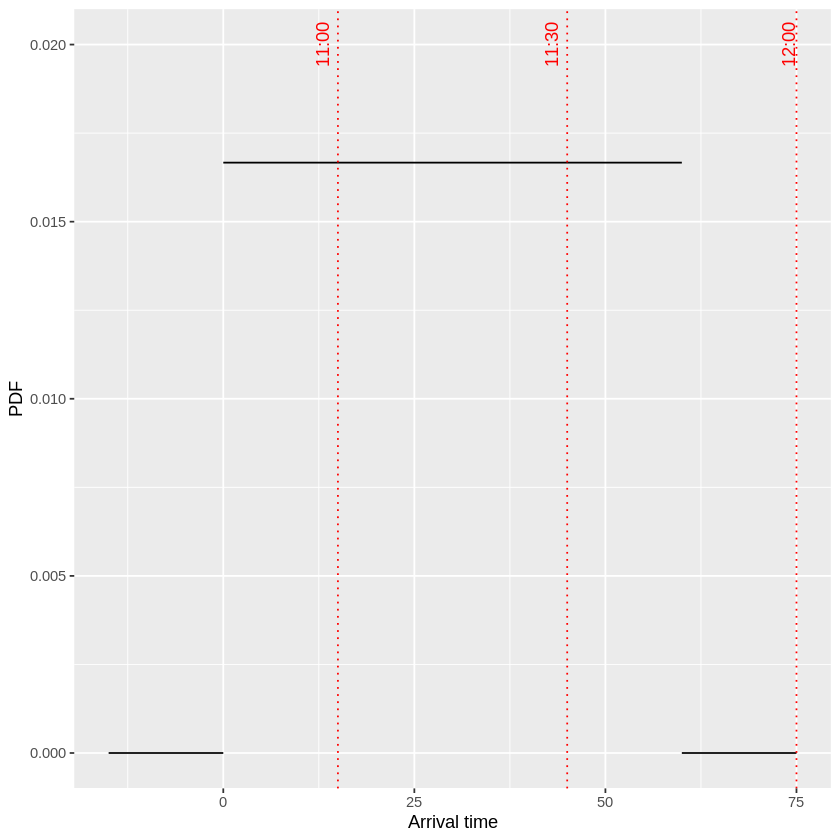

In [35]:
x <- seq(0,60, length.out = 1000)

ggplot() +
geom_line(aes(c(-15,0), c(0,0))) +
geom_line(aes(c(60,75), c(0,0))) +
geom_line(aes(x, dunif(x, min=0, ,max=60))) +
geom_vline(xintercept = c(15, 45, 75), linetype='dotted', colour='red') + 
geom_text(aes(x=13, label='11:00', y=0.02), angle=90, colour='red') +
geom_text(aes(x=43, label='11:30', y=0.02), angle=90, colour='red') +
geom_text(aes(x=74, label='12:00', y=0.02), angle=90, colour='red') +


labs(x='Arrival time', y='PDF')

### P(t < 10) 
The probability of waiting less than 10 minutes is equal to the probability of arraving ten minutes before 11:00 or ten minutes before 11:30. 

In [22]:
P_1 <- integrate(function(n) {dunif(n, min=0, max=60)}, lower=5, upper=15)
P_2 <- integrate(function(n) {dunif(n, min=0, max=60)}, lower=35, upper=45)

#P_1 <- integrate(function(n) {dunif(n, mean=mean, sd=sd)}, lower = 0.25-(1/6), upper = 0.25)
#P_2 <- integrate(function(n) {dnorm(n, mean=mean, sd=sd)}, lower = 0.75-(1/6), upper = 0.75)
cat('The probability of waiting less than 10 minutes is:', signif((P_1$value + P_2$value)*100, digits = 4), '%')

The probability of waiting less than 10 minutes is: 33.33 %

### P(t > 15)
The probability of waiting at least 15 minutes is equal to the probability of arraving between 11:00 and 11:15, and from 11:30 to 11:45. 

In [16]:
P_3 <- integrate(function(n) {dunif(n, min=0, max=60)}, lower=15, upper=30)
P_4 <- integrate(function(n) {dunif(n, min=0, max=60)}, lower=45, upper=60)

#P_3 <- integrate(function(n){dnorm(n, mean=mean, sd=sd)}, lower=0.25, upper=0.5)
#P_4 <- integrate(function(n){dnorm(n, mean=mean, sd=sd)}, lower=0.75, upper=1    )
cat('The probability of waiting at least 15 minutes is:', signif((P_3$value+P_4$value)*100, digits = 4), '%')

The probability of waiting at least 15 minutes is: 50 %

### E[t]
The average waiting time is calculated has the integral of the product of the waiting time in the interval (taken has the difference between the time of arrival and the time next train) and the probability of arrivaing in that interval. 

In [21]:
E1 <- integrate(function(n){dunif(n, min=0, max=60)*(15-n)}, lower=0, upper=15)

E2 <- integrate(function(n){dunif(n, min=0, max=60)*(45-n)}, lower=15, upper=45)

E3 <- integrate(function(n){dunif(n, min=0, max=60)*(75-n)}, lower=45, upper=60)

cat('The average waiting time is:', E1$value +E2$value +E3$value)

The average waiting time is: 15

# Ex. 6 - stock investment

In [18]:
stock_invest = 200*85

mean_year = stock_invest * 0.1
sd_year = stock_invest * 0.12

P = 1 - pnorm(800, mean=mean_year, sd=sd_year)
P

[1] 0.6704574